--- Data Cleaning ---
Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
--------------------

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ti

/tmp/ipython-input-1904045527.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100
/tmp/ipython-input-1904045527.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='viridis')


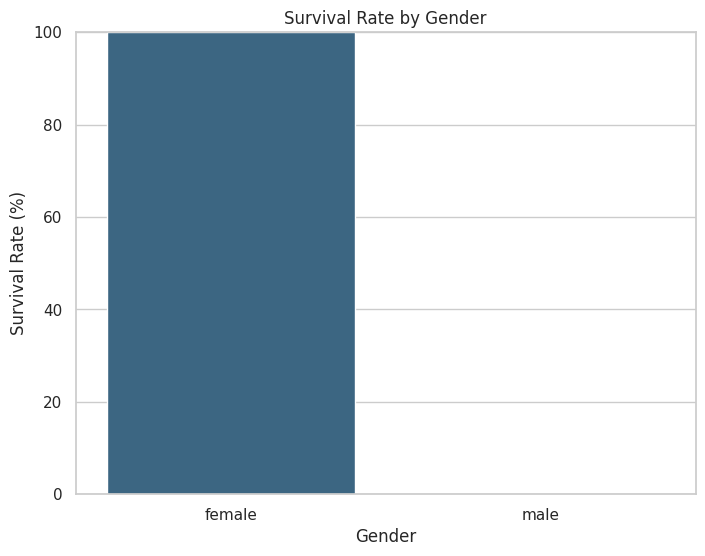

/tmp/ipython-input-1904045527.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette='plasma')


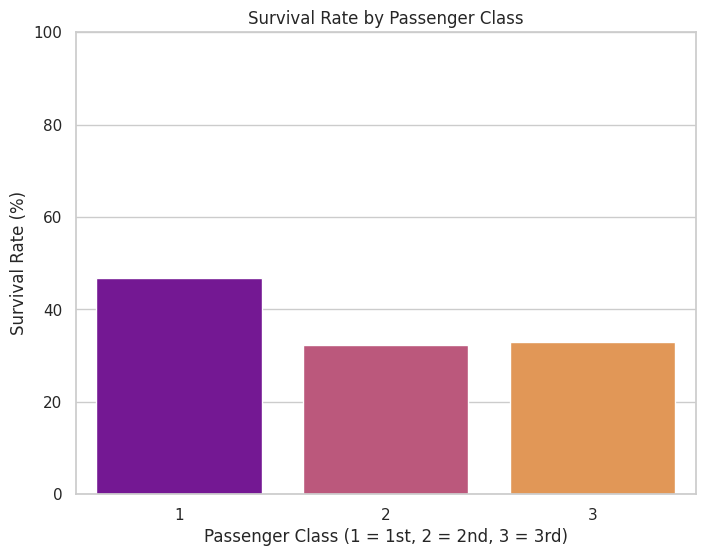

/tmp/ipython-input-1904045527.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_agegroup.index, y=survival_by_agegroup.values, palette='inferno')


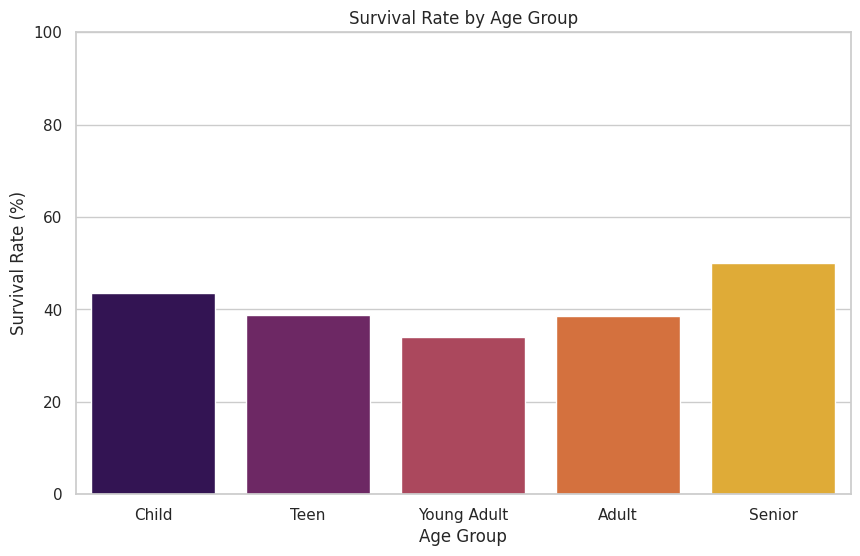

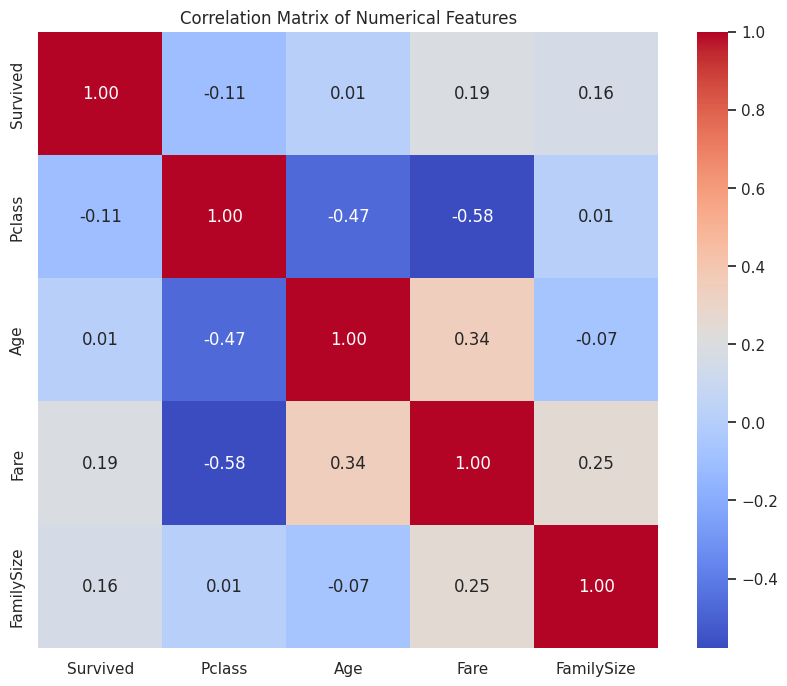

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV file into a pandas DataFrame
df = pd.read_csv('/content/tested[2].csv')


#Data Cleaning
print("--- Data Cleaning ---")

# Display the initial information about the dataset
print("Initial Info:")
df.info()
print("-" * 20)

# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())
print("-" * 20)

# Drop columns that are not useful for this analysis or have too many missing values..
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing 'Fare' value by filling with the median
# The median is less sensitive to outliers than the mean
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Handle missing 'Age' values by filling with the median
# The median is a good choice to preserve the distribution without being skewed by extreme values
df['Age'] = df['Age'].fillna(df['Age'].median())

# Handle missing 'Embarked' values by filling with the mode (most frequent value)
# The mode is the most reasonable imputation for a categorical variable
# Since there are no missing values in this specific test set, this line is defensive
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("-" * 20)

print("\nFinal Info after cleaning:")
df.info()
print("-" * 20)

#Part 2: Exploratory Data Analysis
print("\n--- Exploratory Data Analysis (EDA) ---")

# 1. Descriptive statistics
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())
print("-" * 20)

# 2. Analyze survival rate by gender ('Sex')
print("\nSurvival rate by Gender:")
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_by_sex)
print("-" * 20)

# 3. Analyze survival rate by passenger class ('Pclass')
print("\nSurvival rate by Passenger Class (Pclass):")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_pclass)
print("-" * 20)

# 4. Analyze survival rate by port of embarkation ('Embarked')
print("\nSurvival rate by Port of Embarkation:")
survival_by_embarked = df.groupby('Embarked')['Survived'].mean() * 100
print(survival_by_embarked)
print("-" * 20)

# 5. Analyze survival rate by age groups
# Create age bins for better analysis
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print("\nSurvival rate by Age Group:")
survival_by_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100
print(survival_by_agegroup)
print("-" * 20)

# 6. Analyze survival rate by family size
# Create a new feature for family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Analyze survival rate by family size
print("\nSurvival rate by Family Size:")
survival_by_familysize = df.groupby('FamilySize')['Survived'].mean() * 100
print(survival_by_familysize)
print("-" * 20)

# 7. Analyze correlation between 'Fare' and 'Survived'
# Use a simple correlation matrix for selected numerical features
print("\nCorrelation matrix for numerical features:")
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']].corr()
print(correlation_matrix)
print("-" * 20)

# Part 3: Data Visualization
print("\n--- Data Visualization ---")
sns.set(style="whitegrid") # Set a nice style for the plots

# Plot 1: Survival Rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()

# Plot 2: Survival Rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette='plasma')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylim(0, 100)
plt.show()

# Plot 3: Survival Rate by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_by_agegroup.index, y=survival_by_agegroup.values, palette='inferno')
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Age Group')
plt.ylim(0, 100)
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()